useful sources:
[Youtube Video](https://youtu.be/GP-2634exqA?si=UBOKqQcrudjINcL4)
[Working with tabular data in Python](https://wandb.ai/mostafaibrahim17/ml-articles/reports/Working-with-tabular-data-in-Python--Vmlldzo4MTU4OTgx)

#Step 1: Setting up the Python environment

In [ ]:
!pip install basemap
!pip install scikeras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Step 2: Data collection and preprocessing

In [ ]:
# Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/ECE324_Project/Model/database.csv") # change path for your env
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


(2392, 15)

In [ ]:
data.isnull().sum()/data.shape[0]*100# checking for percentage null value

,0
StudentID,0.0
Age,0.0
Gender,0.0
Ethnicity,0.0
ParentalEducation,0.0
StudyTimeWeekly,0.0
Absences,0.0
Tutoring,0.0
ParentalSupport,0.0
Extracurricular,0.0


In [ ]:
# Handling Missing Values
data=data.interpolate(method ='linear', limit_direction ='forward') #fill in missing (NaN) values in your dataset
# we could also add median or mean or KNNimputer instead of NaN, but since we dont have any missing value we just keep this

In [ ]:
#check for duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [ ]:
#check for garbage value
#since we dont have any object type data, there would be no garbage value

In [ ]:
# check enthinicty distrbution across dataset for any bias
ethnicity_distribution = data['Ethnicity'].value_counts(normalize=True) * 100
print("Ethnicity Distribution in Dataset (%):\n", ethnicity_distribution)
#seems like the data is biased in terms of ethcnicty

Ethnicity Distribution in Dataset (%):
 Ethnicity
0    50.459866
1    20.610368
2    19.648829
3     9.280936
Name: proportion, dtype: float64


 #Step 3: Exploratory data analysis (EDA)

In [ ]:
# Explore the dataset so we can visualize data using multivariate analysis
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


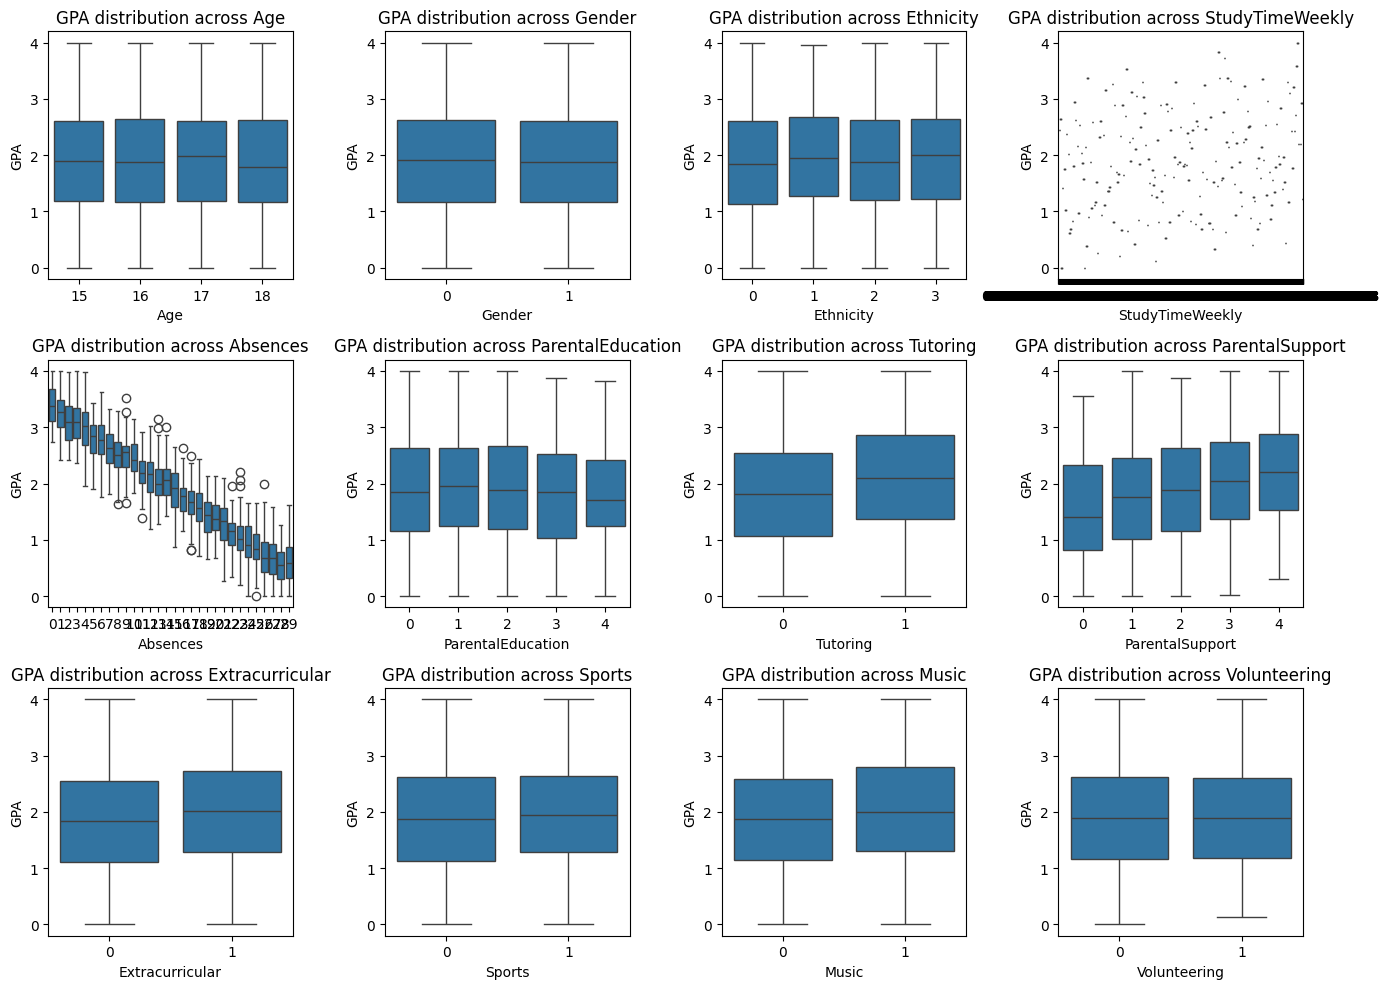

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot faceted multigrids

plt.figure(figsize=(14, 10))

# Select categorical variables
cat_features = ['Age', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Absences', 'ParentalEducation',
                'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for i, feature in enumerate(cat_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=data[feature], y=data["GPA"])
    plt.title(f"GPA distribution across {feature}")

plt.tight_layout()
plt.show()

plt.savefig("boxplots.png", dpi=300, bbox_inches='tight')

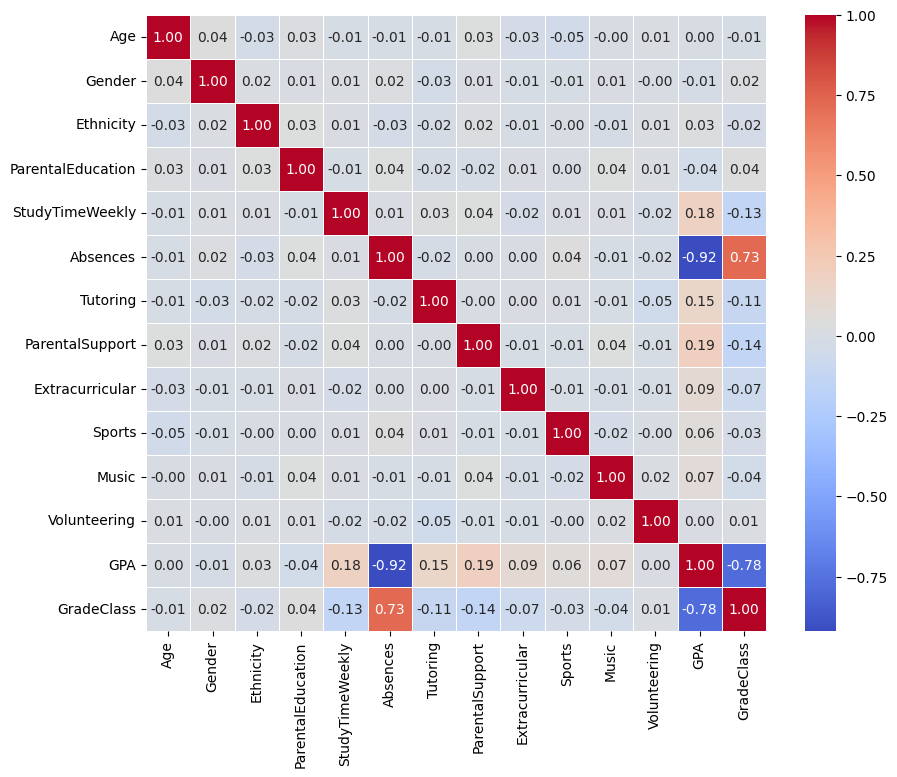

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot heat maps for linear relations

# Select only numerical columns
num_data = data.select_dtypes(include=[np.number]).drop(columns=["StudentID"], errors="ignore")

# Compute correlation matrix
corr = num_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

plt.savefig("heatmaps.png", dpi=300, bbox_inches='tight')

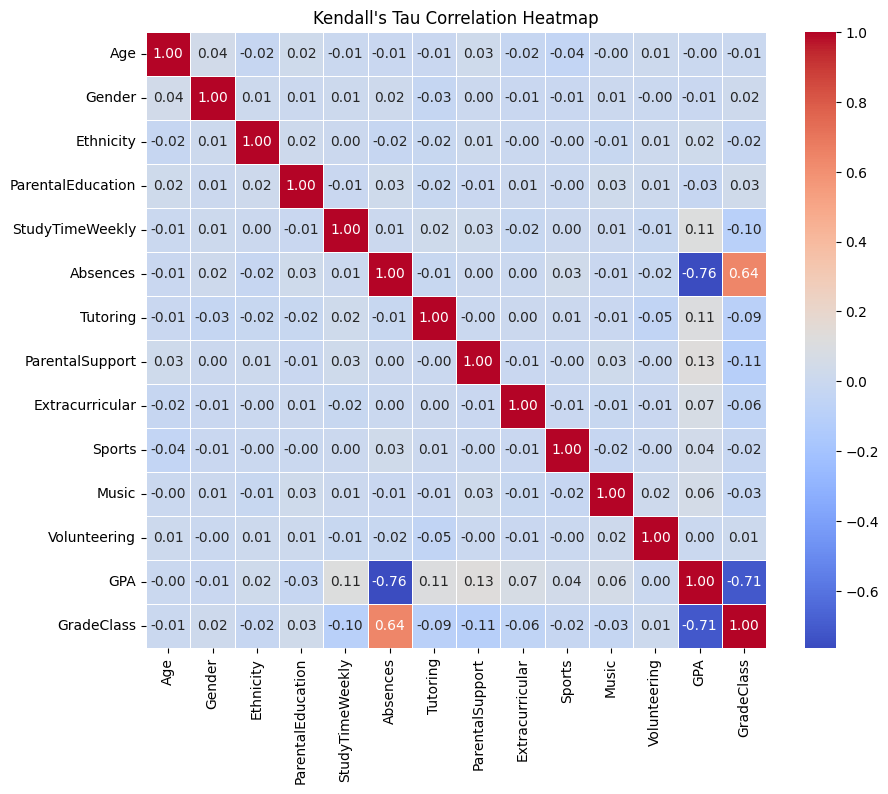

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot heat maps for non-linear relations using Kendall Tau

# Select only numerical columns
num_data = data.select_dtypes(include=[np.number]).drop(columns=["StudentID"], errors="ignore")

# Compute Kendall's Tau correlation matrix
kendall_corr = num_data.corr(method="kendall")

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Kendall's Tau Correlation Heatmap")
plt.show()

# Save figure
plt.savefig("kendall_tau_heatmap.png", dpi=300, bbox_inches='tight')

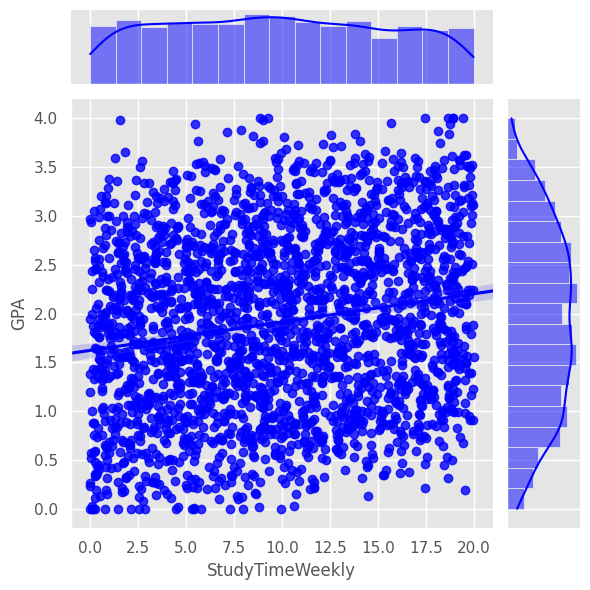

In [ ]:
# Plot a regression line for GPA vs weekly study time
sns.set_theme(style="darkgrid")
plt.style.use('ggplot')
sns.jointplot(data,y='GPA',x='StudyTimeWeekly',kind='reg',truncate=False,color='blue')

plt.savefig("regressionplot.png", dpi=300, bbox_inches='tight')

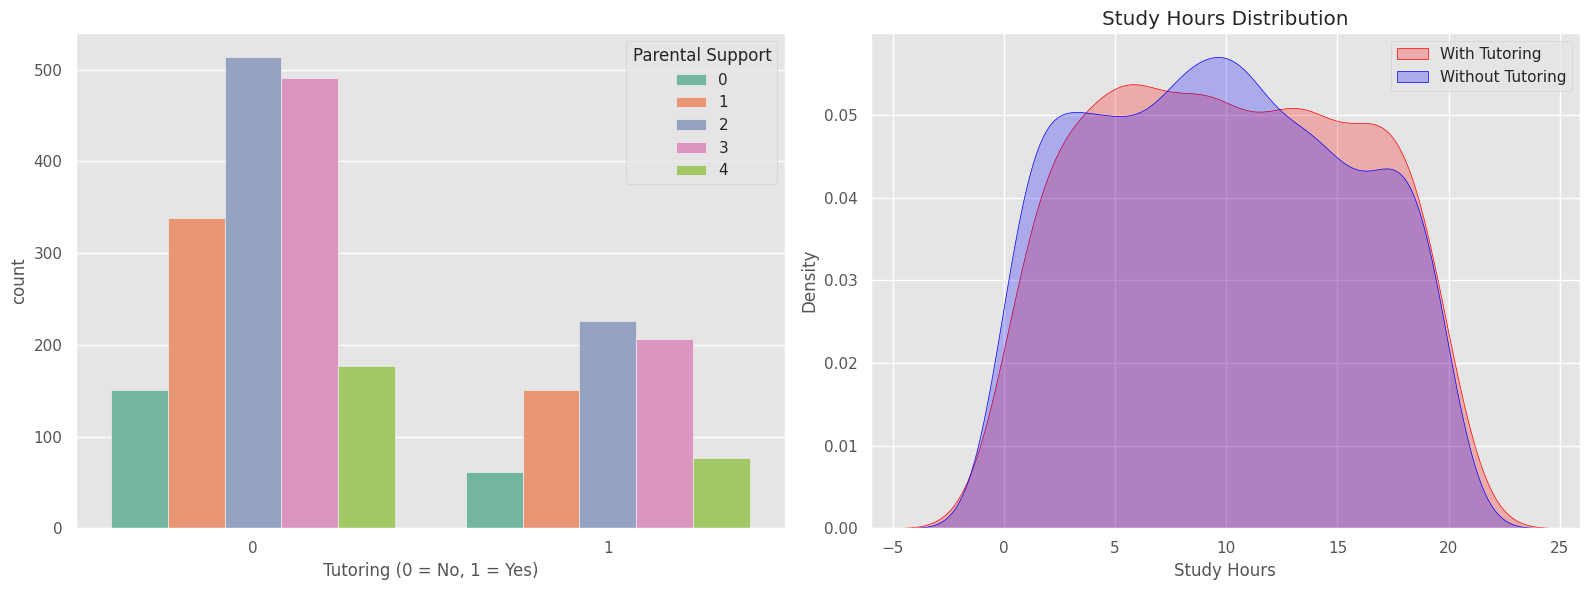

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot parental support, tutoring, and study hours distribution

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.kdeplot(data[data["Tutoring"] == 1]["StudyTimeWeekly"], label="With Tutoring", fill=True, color="red", ax=axes[1])
sns.kdeplot(data[data["Tutoring"] == 0]["StudyTimeWeekly"], label="Without Tutoring", fill=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Study Hours")
axes[1].set_ylabel("Density")
axes[1].set_title("Study Hours Distribution")
axes[1].legend()

sns.countplot(x="Tutoring", hue="ParentalSupport", data = data, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Tutoring (0 = No, 1 = Yes)")


axes[0].legend(title="Parental Support")

plt.tight_layout()
plt.show()

plt.savefig("studyhourdistribution.png", dpi=300, bbox_inches='tight')

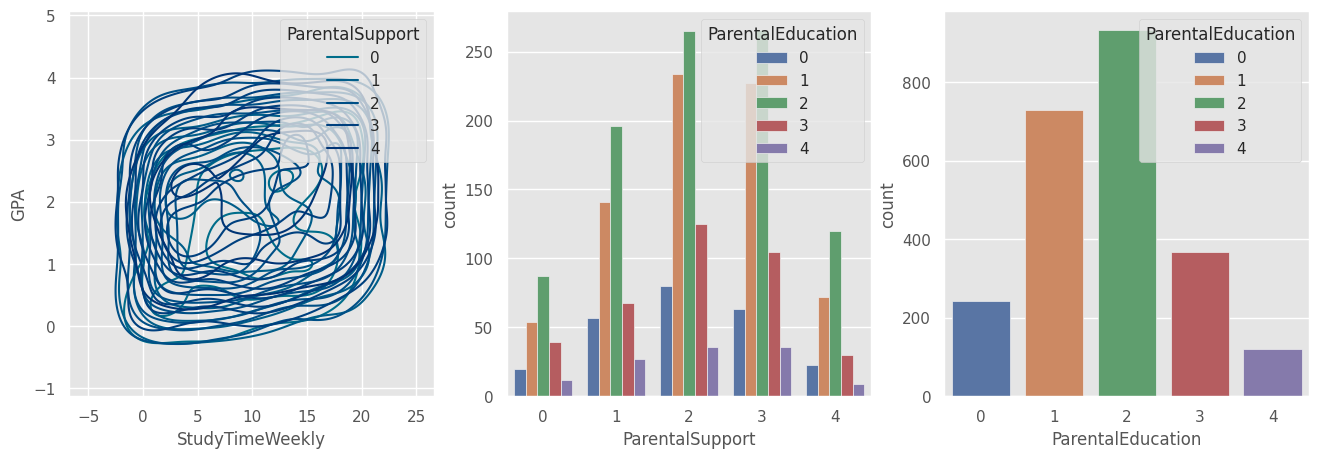

In [ ]:
# Plot the effect of parental support on the GPA and weekly study time

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.kdeplot(data=data,x='StudyTimeWeekly',y='GPA',hue='ParentalSupport',palette="ch:rot=-.65,hue=3,light=.25",ax=axes[0])
sns.countplot(data=data,x='ParentalSupport',hue='ParentalEducation',palette='deep',ax=axes[1])
sns.countplot(data=data,x='ParentalEducation',hue='ParentalEducation',palette='deep',ax=axes[2])

plt.savefig("parentalsupport.png", dpi=300, bbox_inches='tight')

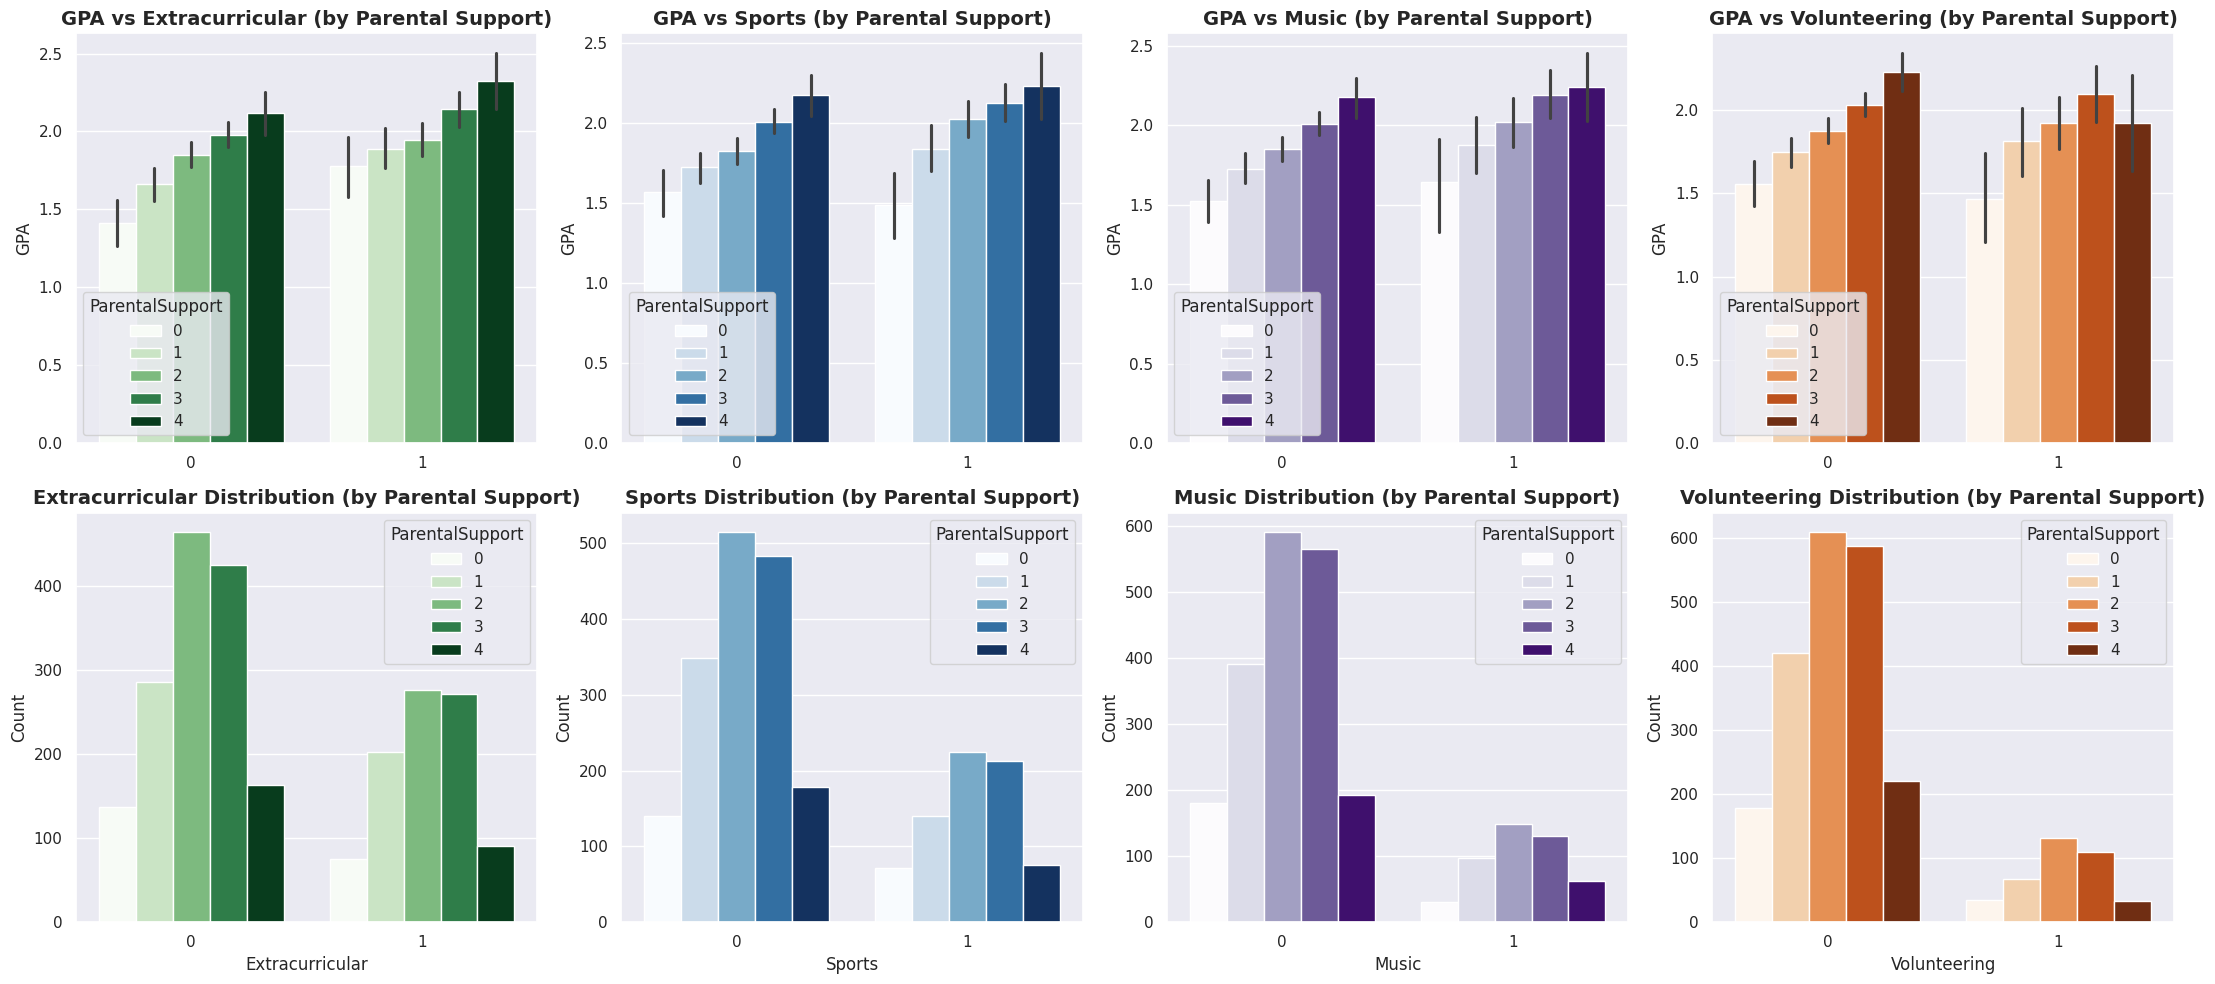

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the effect of parental support and extracurricular activity participation on GPA
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 4, figsize=(22, 10))

activities = ['Extracurricular', 'Sports', 'Music', 'Volunteering']
titles = ["GPA vs Extracurricular", "GPA vs Sports", "GPA vs Music", "GPA vs Volunteering"]
colors = ["Greens", "Blues", "Purples", "Oranges"]

for i, (ax_bar, ax_count, activity, title, color) in enumerate(zip(axes[0], axes[1], activities, titles, colors)):
    sns.barplot(data=data, x=activity, y='GPA', hue="ParentalSupport", palette=color, ax=ax_bar)
    ax_bar.set_title(f"{title} (by Parental Support)", fontsize=14, fontweight='bold')
    ax_bar.set_xlabel("")
    ax_bar.set_ylabel("GPA", fontsize=12)

    sns.countplot(data=data, x=activity, hue="ParentalSupport", palette=color, ax=ax_count)
    ax_count.set_title(f"{activity} Distribution (by Parental Support)", fontsize=14, fontweight='bold')
    ax_count.set_xlabel(activity, fontsize=12)
    ax_count.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

plt.savefig("activityandparentplot.png", dpi=300, bbox_inches='tight')

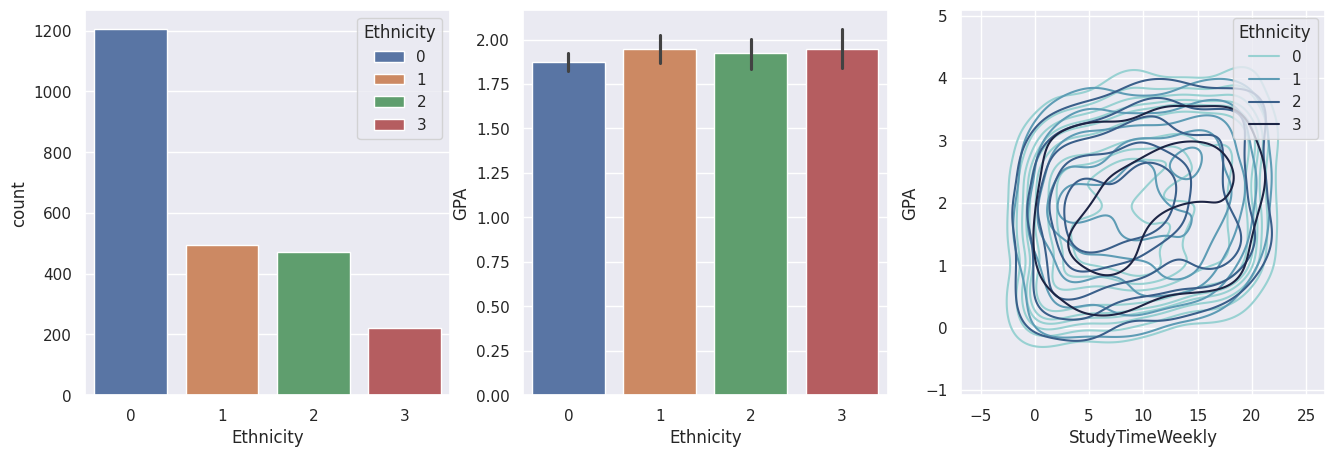

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the ethinicity distribution and its effect on GPA

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

col = 'Ethnicity'

sns.countplot(data=data,x='Ethnicity',palette='deep',hue=col,ax=axes[0])
sns.barplot(data=data,x=data[col],y=data['GPA'],hue=data[col],palette='deep',legend=False,ax=axes[1])

sns.kdeplot(data=data,x='StudyTimeWeekly',y='GPA',hue='Ethnicity',palette="ch:rot=-.25,hue=1,light=.75")

plt.show()

plt.savefig("ethnicityplots.png", dpi=300, bbox_inches='tight')

In [ ]:
# Identify and remove outliers using interquartile range method (IQR)

def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound))]
    return df_cleaned

# Remove outliers from specific columns
df_cleaned = remove_outliers_iqr(data, 'Absences')


#Step 4: Feature engineering

In [ ]:
#from dataset key features include
data = data[['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
             'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
             'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']]
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# do label and one hot encoding
# age, parentalsupport, parental education, ethinicity, garde are already changed to onehot encoding

In [ ]:
#creating new features

#combine ParentalEducation and ParentalSupport into a single metric
data['ParentalInfluence'] = data['ParentalEducation'] * data['ParentalSupport']

# cheking later if this is a good idea or not based on the model!!!!
#categorizing absence into 4 levels
#data['AbsenceLevel'] = pd.cut(data['Absences'], bins=[0,3,7,14, 21], labels=['Ver Low','Low','Moderate', 'High'])

#combine Tutoring and StudyTimeWeekly into a single metric
data['TutoringEffect'] = data['Tutoring'] * data['StudyTimeWeekly']

# cheking later if this is a good idea or not based on the model!!!!
#categorizing StudyTimeWeekly into 3 level
#data['StudyTimeLevel'] = pd.cut(data['StudyTimeWeekly'], bins=[0,5,10,20], labels=['Low','Medium','High'])



In [ ]:

X = data.drop(columns=['GradeClass'])
y = data['GradeClass']

In [ ]:
# features scaling

#normalizng these columns so features with larger ranges (like StudyTimeWeekly)
#cannot dominate the model’s learning process, to make smaller-scale features (like GPA) less important

# not neccesay for XGBOOST or random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(importance)


              Feature  Importance
13                GPA    0.569130
6            Absences    0.173278
0           StudentID    0.087594
5     StudyTimeWeekly    0.042203
15     TutoringEffect    0.018026
8     ParentalSupport    0.017920
14  ParentalInfluence    0.017390
3           Ethnicity    0.012561
1                 Age    0.012481
4   ParentalEducation    0.011309
10             Sports    0.008073
9     Extracurricular    0.007395
2              Gender    0.006362
11              Music    0.006325
7            Tutoring    0.005015
12       Volunteering    0.004937


In [ ]:
# remove features with low importance %
features_to_remove = ['StudentID', 'ParentalSupport','ParentalEducation', 'Tutoring'] #dropping ethinicty
X_refined = X.drop(columns=features_to_remove, errors='ignore')